## DATA620 Week 6 Assignment##

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

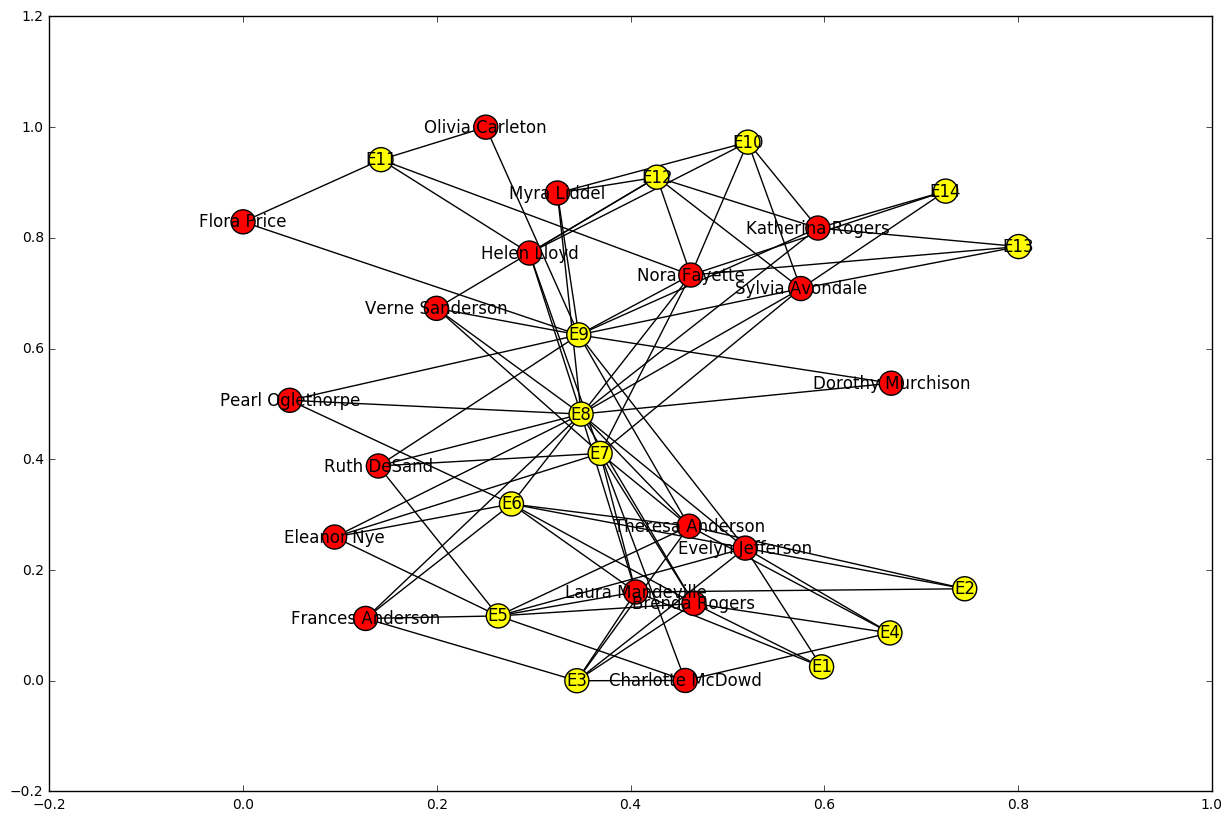

In [51]:
G = nx.davis_southern_women_graph()

women = G.graph['top']
events = G.graph['bottom']

# quick view of graph with coloring of node types
color_map = []
for node in G:
    if len(node) < 4:
        color_map.append('yellow')
    else:
        color_map.append('red')
plt.figure(figsize=(15,10))
nx.draw_networkx(G, node_color=color_map, with_labels=True)
plt.show()

**We can infer the connection strength and node similarity by weighting the edges based on common events.** 

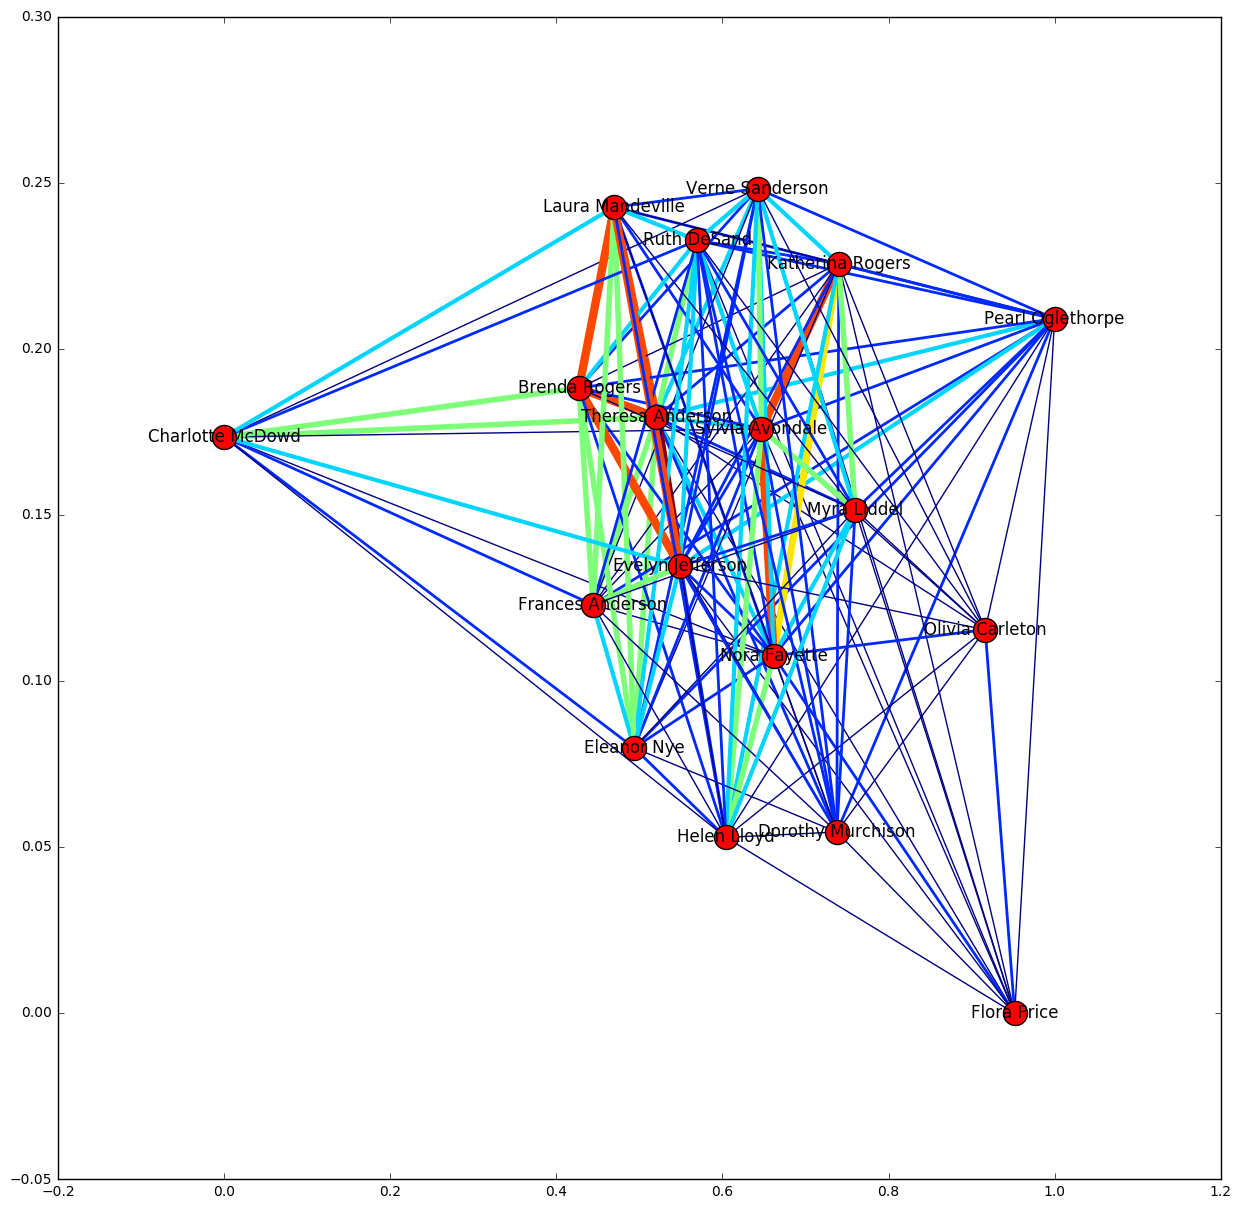

In [52]:
from networkx.algorithms import bipartite as bi

wnet = bi.weighted_projected_graph(G, women, ratio=False)
weights = [edata['weight'] for f,t,edata in wnet.edges(data=True)]
plt.figure(figsize = (15,15))
nx.draw_networkx(wnet, width=weights, edge_color=weights)

**There appear to be sub-graphs. Let's calculate betweenness centrality.**

In [53]:
wnet_btw = nx.betweenness_centrality(wnet)
wnet_btw = {k:round(v,3) for k, v in wnet_btw.items()}

def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    return ms

wnet_btw = sorted_map(wnet_btw)
wnet_btw

[('Evelyn Jefferson', 0.01),
 ('Helen Lloyd', 0.01),
 ('Nora Fayette', 0.01),
 ('Ruth DeSand', 0.01),
 ('Sylvia Avondale', 0.01),
 ('Theresa Anderson', 0.01),
 ('Verne Sanderson', 0.01),
 ('Dorothy Murchison', 0.005),
 ('Katherina Rogers', 0.005),
 ('Myra Liddel', 0.005),
 ('Pearl Oglethorpe', 0.005),
 ('Brenda Rogers', 0.003),
 ('Eleanor Nye', 0.003),
 ('Frances Anderson', 0.003),
 ('Laura Mandeville', 0.003),
 ('Charlotte McDowd', 0.0),
 ('Flora Price', 0.0),
 ('Olivia Carleton', 0.0)]

**Let's look at events now using the same bipartite projection method.**

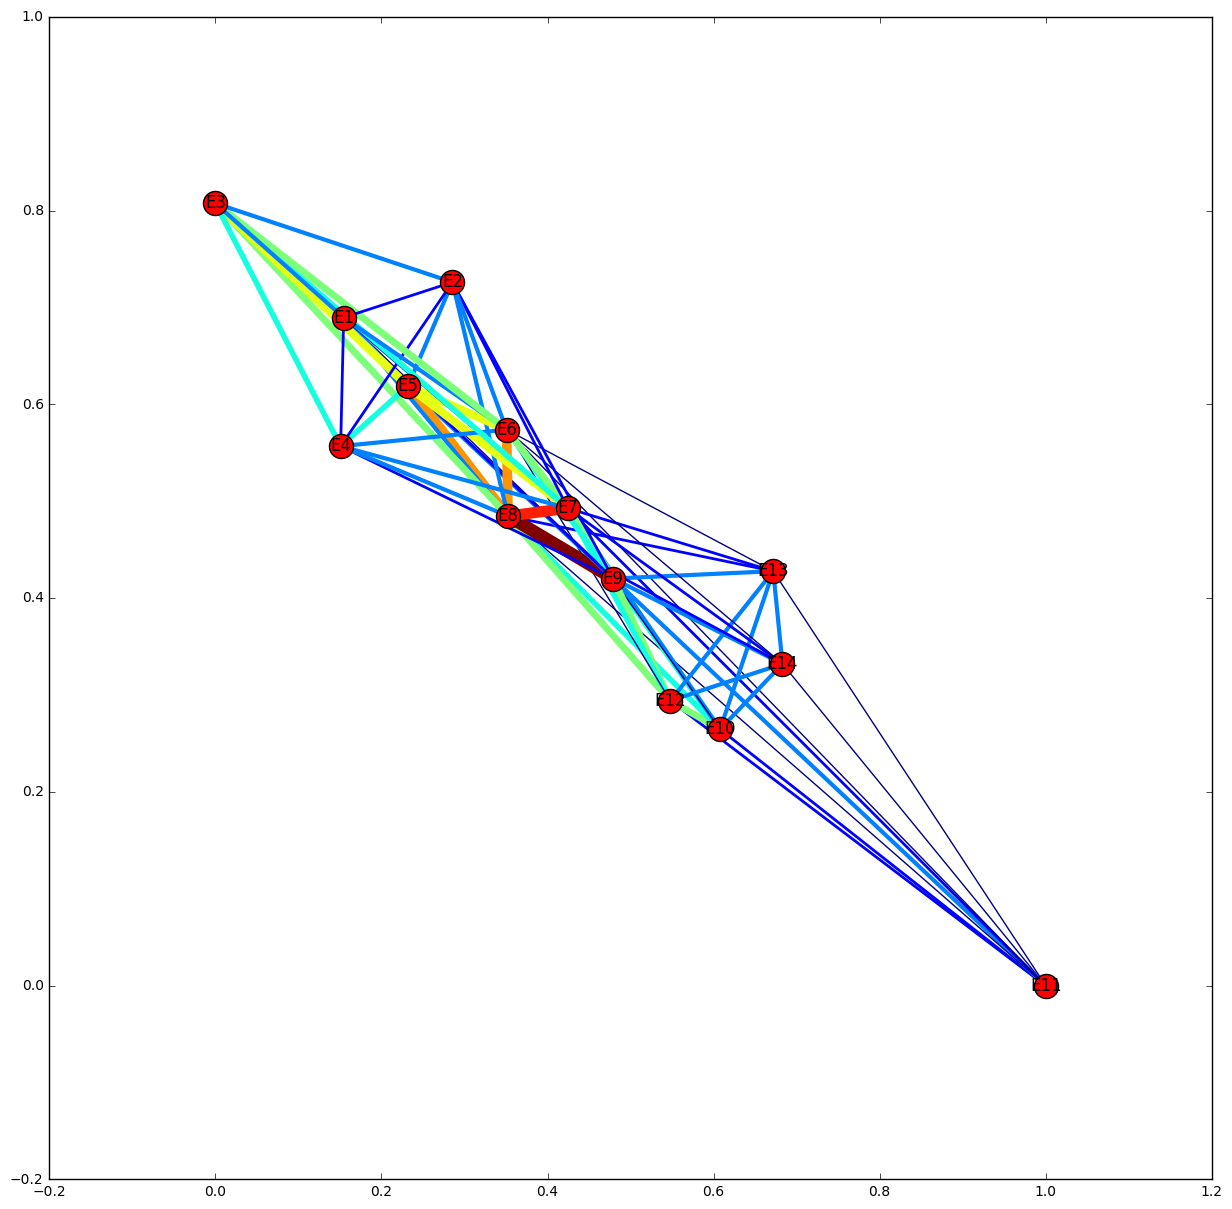

In [54]:
enet = bi.weighted_projected_graph(G, events)
enet.edges(data=True)
weights=[edata['weight'] for f,t,edata in enet.edges(data=True)]
plt.figure(figsize=(15,15))
nx.draw_networkx(enet, width=weights, edge_color=weights)

**A few events (E6, E7, E8, and E9) seem to have really large attendance. Let's look at degrees for each event**

In [56]:
edeg = nx.degree(enet)
edeg = {k:round(v,1) for k, v in edeg.items()}
edeg = sorted_map(edeg)
edeg

[('E6', 13.0),
 ('E7', 13.0),
 ('E8', 13.0),
 ('E9', 13.0),
 ('E1', 8.0),
 ('E10', 8.0),
 ('E11', 8.0),
 ('E12', 8.0),
 ('E13', 8.0),
 ('E14', 8.0),
 ('E2', 8.0),
 ('E3', 8.0),
 ('E4', 8.0),
 ('E5', 8.0)]

**If we subset E6-E9, we would expect to find mostly common edges since they each span so many members.**

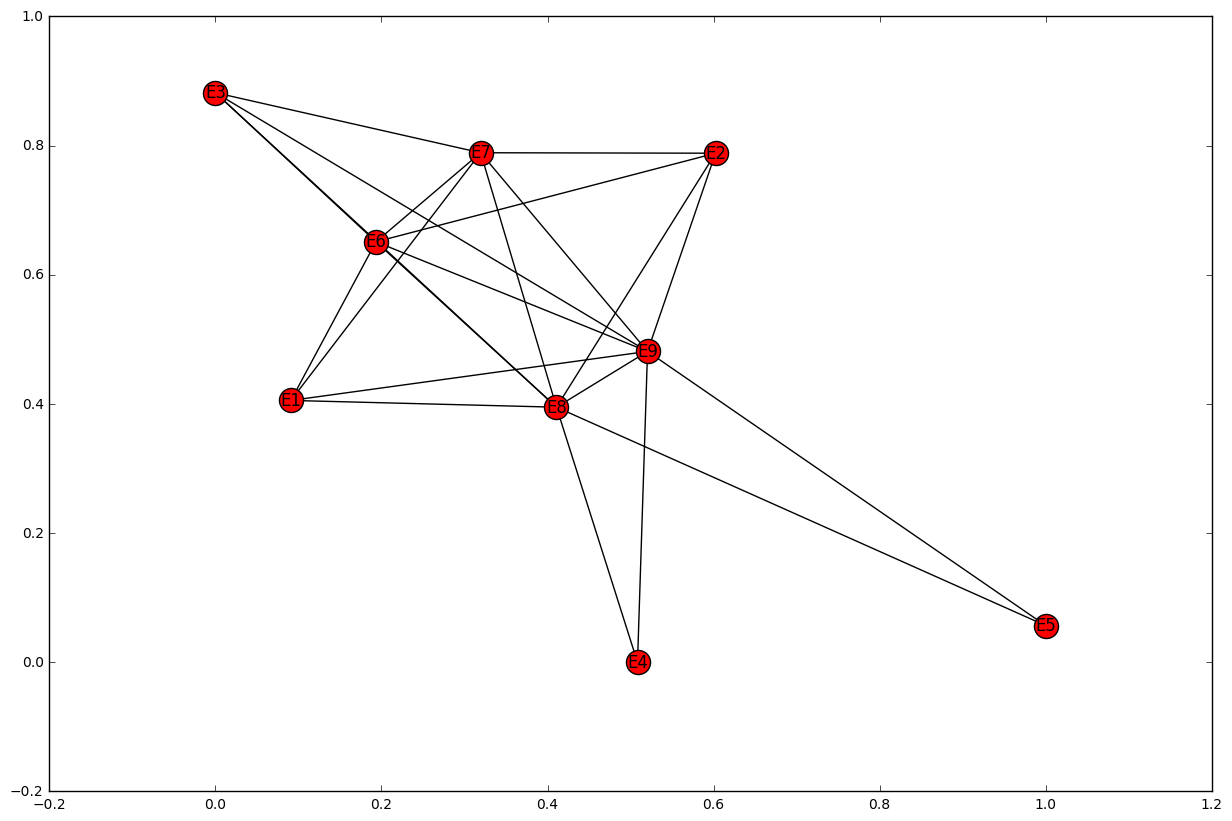

In [57]:
event_center = ['E6','E7','E8', 'E9']
ehigh = nx.Graph([(k,v) for k,v in enet.edges() if k in event_center])
ehigh.edges()
plt.figure(figsize=(15,10))
nx.draw_networkx(ehigh)


> Indeed, this is what we see.

**Conclusion: ** Most events are well-attented. There are at least two groups who attended most of the same events, and there are a few women who attended many events. There are a few events that were attended by nearly all of the women.